In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 선형회귀

통계학에서 선형 회귀는 종속 변수 y와 한 개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.

한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.

## 1-1. 선형 회귀

### 예제 1

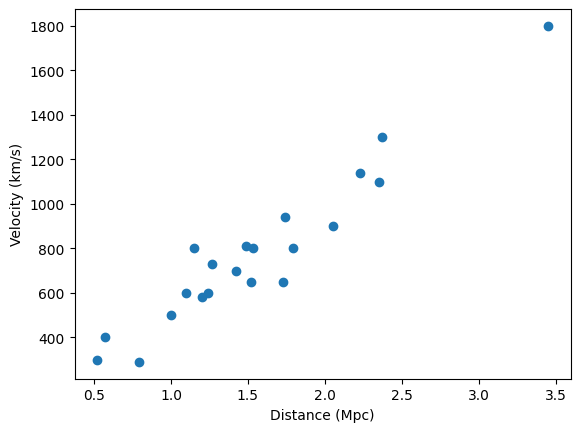

In [ ]:
data_hubble = np.loadtxt("https://raw.githubusercontent.com/jabamseo/SNUcourse/refs/heads/main/CH3/hubble.txt")
x = data_hubble[:,0] # 은하까지의 거리 (단위: Mpc)
y = data_hubble[:,1] # 은하가 멀어지는 속도 (단위: km/s)

plt.scatter(x,y)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(x.reshape(-1,1), y)    # x.reshape(-1,1): 샘플이 n개, 특성이 1개인 입력으로 변경한다는 뜻

# 기울기와 절편 구하기
print(lr.coef_)
print(lr.intercept_)

[487.51618131]
25.75471169233583


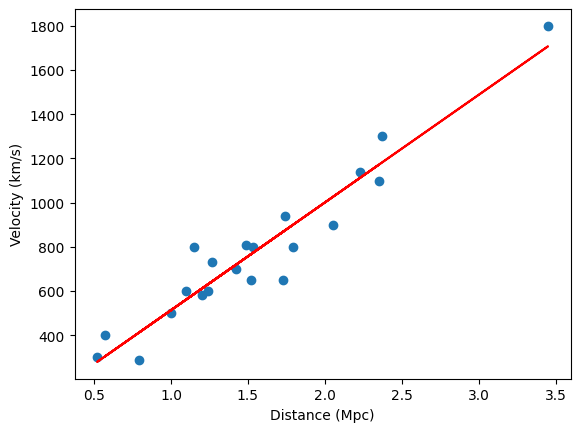

In [ ]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x.reshape(-1,1)), color='red')
#plt.plot(x, lr.coef_*x + lr.intercept_, color='red')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

In [ ]:
print(lr.score(x.reshape(-1,1), y))   # R^2 점수

0.9154877367289038


In [ ]:
print(lr.predict([[5]]))

[2463.33561825]


### 예제 2

#### Trial 1

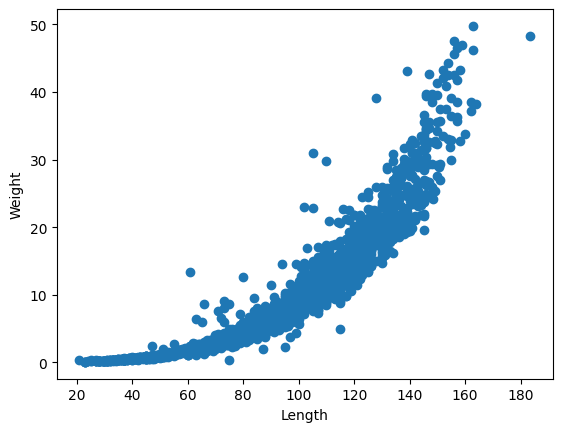

In [ ]:
data_fish = np.loadtxt("https://raw.githubusercontent.com/jabamseo/SNUcourse/refs/heads/main/CH3/fish.txt")
x = data_fish[:,0] # 길이
y = data_fish[:,1] # 무게

plt.scatter(x,y)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(x.reshape(-1,1), y)    # x.reshape(-1,1): 샘플이 n개, 특성이 1개인 입력으로 변경한다는 뜻

# 기울기와 절편 구하기
print(lr.coef_)
print(lr.intercept_)

[0.25534775]
-14.456790234004226


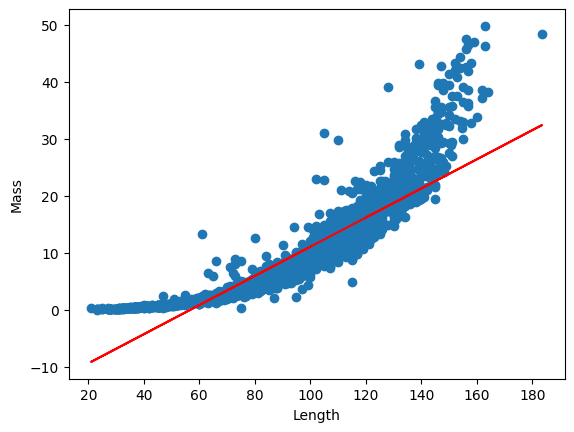

In [ ]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x.reshape(-1,1)), color='red')
#plt.plot(x, lr.coef_*x + lr.intercept_, color='red')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

In [ ]:
print(lr.score(x.reshape(-1,1), y))   # R^2 점수

0.8016455188870631


#### Trial 2

무게(M)와 길이(L)은 $M = AL^b$의 관계라는 걸 알고 있다면, 무게와 길이에 로그를 취하여 우리가 아는 일차함수 꼴로 만들 수 있다:

$$\text{log}M = \text{log}A+b\text{log}L ⇒ y = a_1x+a_2$$

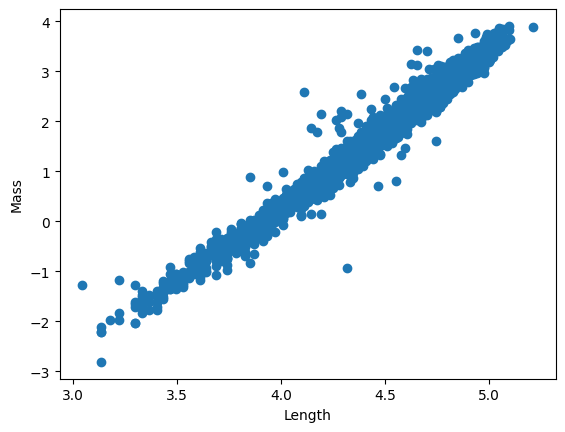

In [ ]:
data_fish = np.loadtxt("https://raw.githubusercontent.com/jabamseo/SNUcourse/refs/heads/main/CH3/fish.txt")
x = np.log(data_fish[:,0]) # 길이
y = np.log(data_fish[:,1]) # 무게

plt.scatter(x,y)
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(x.reshape(-1,1), y)    # x.reshape(-1,1): 샘플이 n개, 특성이 1개인 입력으로 변경한다는 뜻

# 기울기와 절편 구하기
print(lr.coef_)
print(lr.intercept_)

[3.13897485]
-12.289372277605471


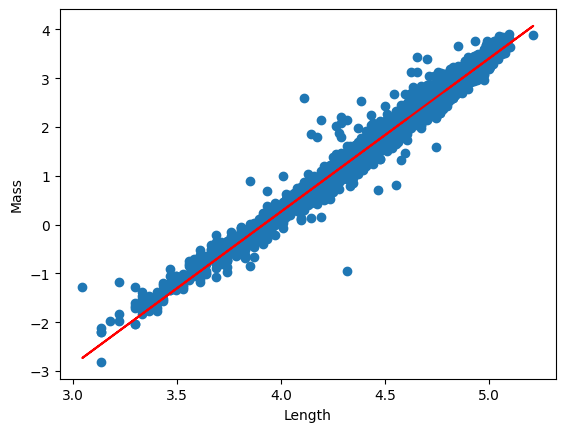

In [ ]:
plt.scatter(x,y)
plt.plot(x, lr.predict(x.reshape(-1,1)), color='red')
#plt.plot(x, lr.coef_*x + lr.intercept_, color='red')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

In [ ]:
print(lr.score(x.reshape(-1,1), y))   # R^2 점수

0.9715955171002039


In [ ]:
print(lr.predict([[5]]))
np.exp(3.40550196)

[3.40550196]


np.float64(30.129415690291037)

## 1-2. 곡선 적합
곡선 적합(Curve Fitting)은 주어진 데이터 포인트에 가장 잘 맞는 곡선 또는 함수를 찾는 과정이다. 데이터의 패턴을 분석하고, 추세를 파악하거나, 미래 값을 예측하는 데 사용된다.

대표적인 방법으로는 보간법과 회귀분석이 있다. 보간법은 주어진 점들을 정확히 지나는 함수를 찾고, 회귀분석은 데이터의 추세를 반영하는 함수를 찾는 방법이다.

### 예제 1

In [ ]:
from scipy.optimize import curve_fit

data_hubble = np.loadtxt("https://raw.githubusercontent.com/jabamseo/SNUcourse/refs/heads/main/CH3/hubble.txt")
x = data_hubble[:,0] # 은하까지의 거리 (단위: Mpc)
y = data_hubble[:,1] # 은하가 멀어지는 속도 (단위: km/s)

# y = a * x + b 형태의 함수 정의
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, x, y)
a_est, b_est = popt
print(a_est, b_est)

487.51618102396947 25.754711286213364


In [ ]:
from sklearn.metrics import r2_score
popt, pcov = curve_fit(func, x, y)
y_pred = func(x, *popt)
r2_score(y, y_pred)

0.9154877367289038

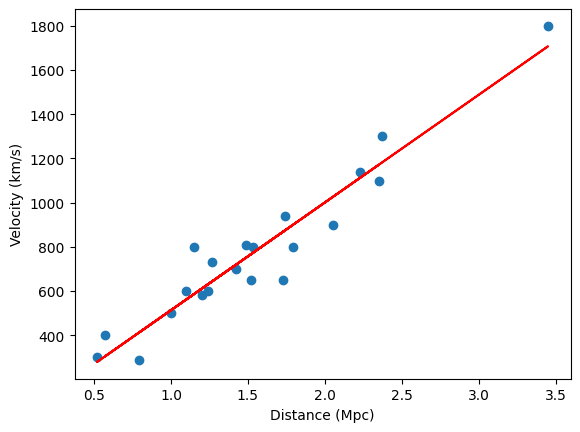

In [ ]:
plt.scatter(x,y)
plt.plot(x, a_est*x+b_est, color='red')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()

### 예제 2


In [ ]:
data_fish = np.loadtxt("https://raw.githubusercontent.com/jabamseo/SNUcourse/refs/heads/main/CH3/fish.txt")
x = data_fish[:,0] # 길이
y = data_fish[:,1] # 무게

# y = a * x^b + c 형태의 함수 정의
def func(x, a, b, c):
    return a*x**b + c

popt, pcov = curve_fit(func, x, y)
print(popt)

[ 3.95452937e-06  3.18054504e+00 -1.07377470e-01]


In [ ]:
from sklearn.metrics import r2_score
popt, pcov = curve_fit(func, x, y)
y_pred = func(x, *popt)
r2_score(y, y_pred)

0.93962697557921

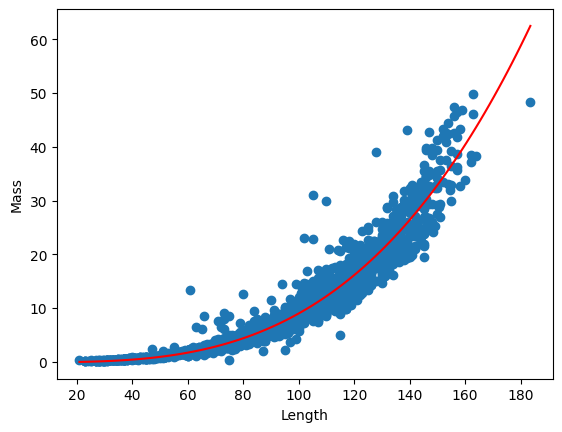

In [ ]:
xarr = np.linspace(x.min(), x.max(), 100)
plt.scatter(x,y)
plt.plot(xarr, popt[0]*xarr**popt[1] + popt[2], color='red')
plt.xlabel('Length')
plt.ylabel('Mass')
plt.show()

------------------------------
# 2. 로지스틱 회귀
둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 한다. 그리고 이런 문제를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다.

- 참고: https://wikidocs.net/206425

In [ ]:
# x 는 종양의 크기를 센티미터 단위로 기록한 것이다.
x = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

# LogisticRegression() 함수가 작동하려면 X를 행에서 열로 재형성해야 한다.
# y는 종양이 암인지 여부를 나타낸다 (0은 "아니오", 1은 "예").
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

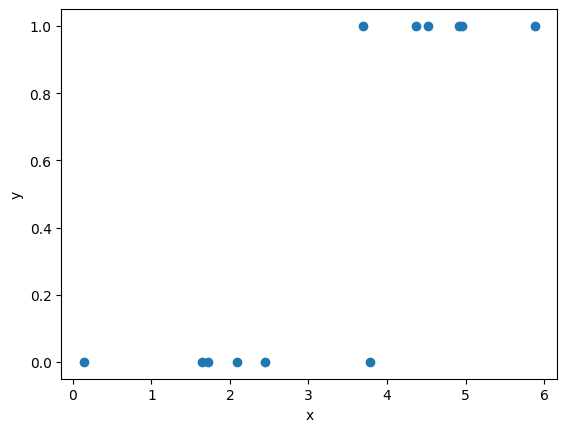

In [ ]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [ ]:
# 크기가 3.46mm인 종양이 암인지 예측한다.
print(lr.predict(np.array([3.46]).reshape(-1,1)))

[0]


In [ ]:
# 크기가 3.46mm인 종양이 암일 확률을 보여준다
print(lr.predict_proba(np.array([3.46]).reshape(-1,1)))

[[0.50241666 0.49758334]]


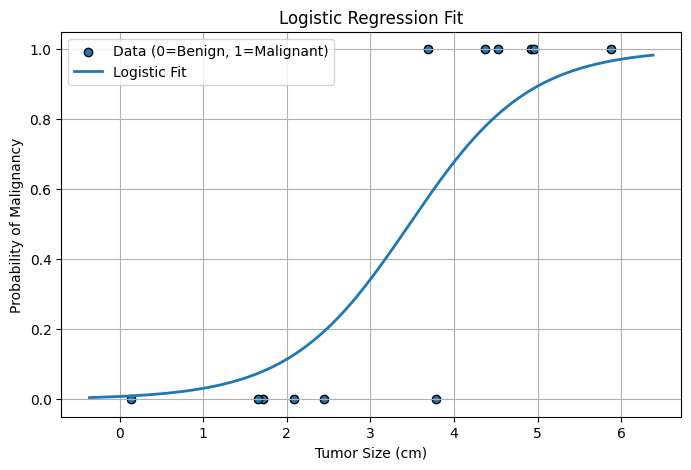

In [ ]:
# Generate points for plotting the sigmoid curve
x_plot = np.linspace(x.min() - 0.5, x.max() + 0.5, 300).reshape(-1,1)
y_prob = lr.predict_proba(x_plot)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data (0=Benign, 1=Malignant)', edgecolors='k')
plt.plot(x_plot, y_prob, label='Logistic Fit', linewidth=2)
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Probability of Malignancy')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

____________________________
# 3. k-평균 클러스터링

k-평균 클러스터링은 그룹 중심까지의 거리를 최소화하도록 다변량 데이터를 상대적으로적은 수($k$)의 그룹 또는 범주로 분류하는 비지도 기법.

/tmp/ipython-input-56-3349451184.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


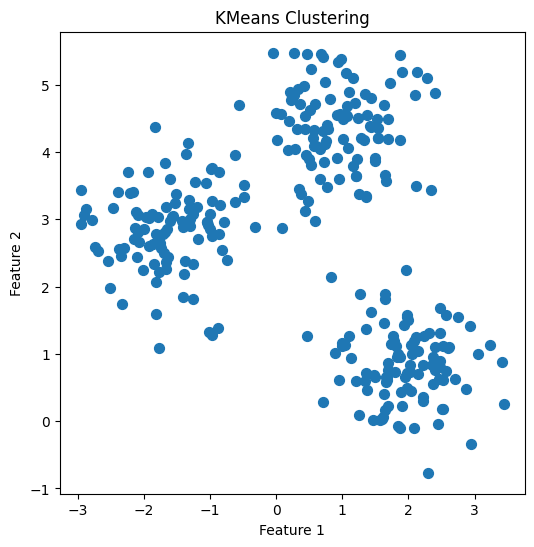

In [ ]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2. 예제용 데이터 만들기
#    make_blobs: 클러스터(뭉치)가 있는 2차원 점들을 랜덤으로 생성해 줘요.
X, y_true = make_blobs(n_samples=300,    # 총 300개의 점
                       centers=3,         # 3개의 뭉치(클러스터)
                       cluster_std=0.60,  # 뭉치의 퍼짐 정도
                       random_state=0)    # 결과 재현을 위한 시드

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

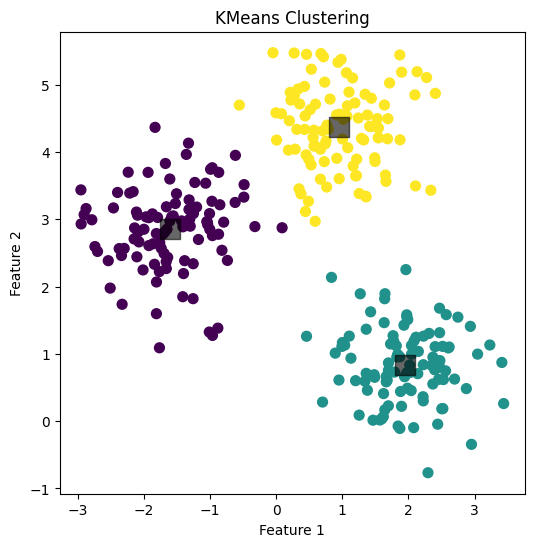

In [ ]:
# 3. KMeans 모델 만들기
#    n_clusters=3 → 우리가 찾고 싶은 그룹 개수를 3으로 설정!
kmeans = KMeans(n_clusters=3,    # 그룹(클러스터) 수
                init='k-means++',# 중심점 초기화 방법 (성능 좋음)
                n_init=10,       # 서로 다른 초기값으로 10번 반복 학습
                random_state=0)  # 결과 재현을 위한 시드

# 4. 모델 학습(클러스터링 수행)
kmeans.fit(X)

# 5. 결과 확인
labels = kmeans.labels_       # 각 데이터가 속한 클러스터 번호 (0, 1, 2)
centers = kmeans.cluster_centers_  # 찾은 클러스터 중심 좌표

# 6. 그래프로 시각화
plt.figure(figsize=(6, 6))
# 각 점을 속한 클러스터 번호에 따라 색칠
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# 중심점은 검정색 네모로 크게 표시
plt.scatter(centers[:, 0], centers[:, 1],
            c='black', s=200, alpha=0.6, marker='s')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()